### Упражнение 1. Списки с одинаковым содержимым

Определите, содержат ли списки $A$ и $B$ из одинаковые наборы элементов.


#### Пример

| <font size=3>Входные последовательности</font> | <font size=3>Выходная последовательность</font> |
| :---: | :---: |
| <font size=3>1 3 1<br>1 1 3</font> | <font size=3>True</font> |
| <font size=3>1 3 1<br>1 3 3</font> | <font size=3>False</font> |

In [1]:
import random
alphabet = list(range(5))
N = 20
A = [random.choice(alphabet) for _ in range(N)]
if random.randint(0, 2):
    B = [random.choice(alphabet) for _ in range(N)]
else:
    B = random.shuffle(A)
    

In [4]:
def inp(L):
    for i in range(len(L)-1):
        j = i + 1
        while j >= 1 and L[j-1] > L[j]:
            L[j], L[j-1] = L[j-1], L[j]
            j -= 1
    return L
print("True" if inp(A) == inp(B) else "False")

False


### Упражнение 2. Наиболее близкие точки

Дан список $A$ различных точек на коорднатной прямой. Распечатайте все пары точек, расстояние между которыми минимально.

In [173]:
import random
N = random.randint(10, 20)
A = random.sample(range(100), N)
#print(A)

def close_(L):
    def inp(L):
        for i in range(len(L)-1):
            j = i + 1
            while j >= 1 and L[j-1] > L[j]:
                L[j], L[j-1] = L[j-1], L[j]
                j -= 1
        return L
    b = inp(A)
    print(b)
    min_ = b[1] - b[0] 
    flag = False
    for i in range(2, len(b)):   
        if b[i]-b[i-1] < min_:
            min_ = b[i] - b[i-1]
            flag = True
    for i in range(2,len(b)):
        if b[i] - b[i-1] == min_ and flag == False:
              print(b[0],b[1],"/n",b[i-1],b[i])
        elif b[i] - b[i-1] == min_ and flag == True:
            print(b[i-1],b[i])
close_(A)
            

[2, 11, 21, 27, 31, 46, 59, 61, 79, 80, 84, 91]
79 80


### Упражнение 3. Треугольники

Заданы $N$ попарно разлиных длин отрезков. Вычислить количество способов, которыми из этих отрезков можно сложить треугольник. Возможно ли, чтобы алгоритм работал с эффективностью $O(N^2)$?

In [227]:
import random
N = random.randint(10, 20)
# A = random.sample(range(100), N)
# print(N)
print(A)
A = [2,2,2,2,2]
quantity = 0
for i in range(0,len(A)-2):
    for j in range(i+1,len(A)-1):
        for k in range(j+1,len(A)):
            #print(A[i],A[j],A[k])
            if (A[i]+A[j]-A[k])*(A[i]+A[k]-A[j])*(A[j]+A[k]-A[i]) > 0:
                quantity +=1
print(quantity)

[2, 2, 2, 2, 2]
10


In [5]:
import random
N = random.randint(10, 20)
A = random.sample(range(100), N)
#A = [2,2,2,2,2]
quantity = 0
A.sort(reverse = True)
for i in range(0,len(A)-2):
    for j in range(i + 1, len(A)-1):
        if A[j] <= A[i]/2:
            break
        for k in range(j+1,len(A)):
            if A[k] + A[j] <= A[i]:
                break
            quantity += 1
print(quantity)

10


### Упражнение 4. Сортировка расческой

Напишите функцию, сортирующую функцию с помощью алгоритма сортировки [расческой](https://ru.wikipedia.org/wiki/%D0%A1%D0%BE%D1%80%D1%82%D0%B8%D1%80%D0%BE%D0%B2%D0%BA%D0%B0_%D1%80%D0%B0%D1%81%D1%87%D1%91%D1%81%D0%BA%D0%BE%D0%B9)

In [14]:
a = [int(x) for x in input().split()]

def rascheska(L):  
    flag = False
    step = int(len(L)//1.247)
    while flag == False:  
        if step <= 1:
            step = 1
            flag = True
        i = 0
        while i + step < len(L):
            if L[i] > L[i + step]:
                L[i + step],L[i] = L[i],L[i + step]
                flag = False
            i += 1
            print(step)
        step = int(step//1.247)
    
rascheska(a)
print(a)

8 9 10 13 14 11
4
4
3
3
3
2
2
2
2
1
1
1
1
1
1
1
1
1
1
[8, 9, 10, 11, 13, 14]


In [214]:
def rascheska(L): 
    step = len(L)
    while step >= 1:
        #print(step)
        for idx in range(len(L)-step):
            if L[idx] > L[idx+step]:
                L[idx+step],L[idx] = L[idx],L[idx+step]
        step = int(step//1.247)
    return L

a = [int(x) for x in input().split()]
print(rascheska(a))

4 6 7 4 2 1 45 3 23 12 78 8 9 0
14
11
8
6
4
3
2
1
[0, 1, 2, 3, 4, 4, 6, 7, 8, 9, 12, 23, 45, 78]


8 length done
16 length done
32 length done
64 length done
128 length done
256 length done
512 length done
1024 length done
2048 length done
4096 length done


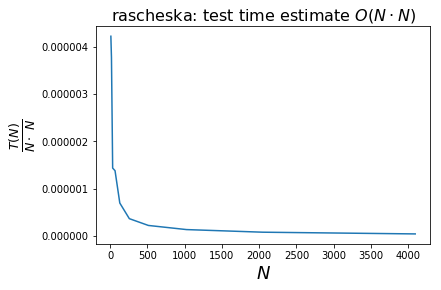

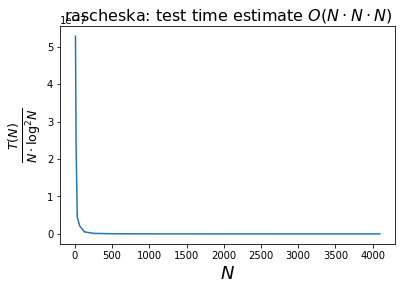

In [249]:
import timeit
import math
import matplotlib.pyplot as plt
start = 8
factor = 2
num_points = 10
num_repeats = 10
N_min = start
N_max = start * factor**(num_points - 1)
N_list = []
T_list = []
n2_list = []
n3_list = []
N = N_min
setup = """
import random
L=list(range(N))
random.shuffle(L)

def rascheska(L): 
    step = len(L)
    while step >= 1:
        for idx in range(len(L)-step):
            if L[idx] > L[idx+step]:
                L[idx+step],L[idx] = L[idx],L[idx+step]
        step = int(step//1.247)
    return L
"""
while N <= N_max:
    T = timeit.timeit(
        stmt="a = L[:];rascheska(a)",
        setup=setup,
        number=num_repeats,
        globals=dict(N=N)
    )
    T_copy = timeit.timeit(
        stmt="a = L[:]",
        setup=setup,
        number=num_repeats,
        globals=dict(N=N)
    )
    T -= T_copy
    N_list.append(N)
    T_list.append(T)
    n2_list.append(T / (N ** 2))
    n3_list.append(T / (N ** 3))
    print("{} length done".format(N))
    N *= factor
    
plt.plot(N_list, n2_list)
plt.xlabel(r"${N}$", fontsize=18)
plt.ylabel(r"$\frac{T(N)}{N \cdot \ N}$", fontsize=18)
plt.xscale("linear")
plt.yscale("linear")
plt.title('rascheska: test time estimate $O(N \cdot N)$', fontsize=16)
plt.show()

plt.plot(N_list, n3_list)
plt.xlabel(r"${N}$", fontsize=18)
plt.ylabel(r"$\frac{T(N)}{N \cdot \log^2 N}$", fontsize=18)
plt.xscale('linear')
plt.yscale('linear')
plt.title('rascheska: test time estimate $O(N \cdot N \cdot N)$', fontsize=16)
plt.show()

### Упражнение 5. Сортировка Шелла

Напишите функцию, сортирующую список с помощью алгоритма сортировки [Шелла](https://ru.wikipedia.org/wiki/%D0%A1%D0%BE%D1%80%D1%82%D0%B8%D1%80%D0%BE%D0%B2%D0%BA%D0%B0_%D0%A8%D0%B5%D0%BB%D0%BB%D0%B0). Добавьте возможность изменения длины промежутка согласно последовательностям Седжвика и Пратта.

In [19]:
def shell(L):
    d = int(len(L)//2)
    while d > 0:
        for i in range(d,len(L)):
            temp = L[i] 
            j = i       
            while j >= d and L[j - d] > temp:
                L[j] = L[j - d]
                j = j - d
            L[j] = temp
        d = int(d//2)

    return L

a = [10, 2, 3, 4, 5, 6, 7, 4, 5, 5, 6, 7, 8, 12, 6, 9]       
print(shell(a))

[2, 3, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 8, 9, 10, 12]


С последовательностью Седжвика

In [20]:
#a = [int(i) for i in input().split()]
a = [2,4,6,7,8,9,7,6,5,4,5]
def sedg(L):
    gap = []
    d = 0
    i = 0
    while 3*d <= len(L):
        #print(i,d)
        if i % 2 == 0:
            d = int(9*2**i - (9*2**(i/2)) + 1)
        else:
            d = int(8*2**i - 6*2**((i+1)/2) + 1)
        gap.append(d)
        i += 1
    
    return gap[::-1]
print(sedg(a))

        
    
def shell_S(L):
    gaps = sedg(L)
    for gap in gaps:
        for i in range(gap, len(L)):  
            temp = L[i] 
            j = i
            while j >= gap and L[j - gap] > temp:
                L[j] = L[j - gap]
                j = j - gap
            L[j] = temp

shell_S(a)
print(a)
     
    

[5, 1]
[2, 4, 4, 5, 5, 6, 6, 7, 7, 8, 9]


In [27]:
from math import log

def Pratt(L):
    d = []
    
    for i in range(int(log(len(L), 2))):
        for j in range(int(log(len(L), 3))):         
            d_i = 2**i * 3**j
            if d_i > len(L)/2:
                break
            d.append(d_i)
    
    return sorted(d, reverse=True)
print(Pratt(a))

def shell_P(L): 
    gaps = Pratt(L)
    for gap in gaps:
        for i in range(gap, len(L)):  
            temp = L[i] 
            j = i
            while j >= gap and L[j - gap] > temp:
                L[j] = L[j - gap]
                j = j - gap
            L[j] = temp
    
a = [2,4,6,7,8,9,7,6,5,4,5]
shell_P(a)
print(a)

[4, 3, 2, 1]
[2, 4, 4, 5, 5, 6, 6, 7, 7, 8, 9]


Оценка временной сложности сортировки Шелла

In [2]:
import timeit
import math
import matplotlib.pyplot as plt
start = 8
factor = 2
num_points = 10
num_repeats = 10
N_min = start
N_max = start * factor**(num_points - 1)
N_list = []
T_list = []
n2_list = []
nlogn2_list = []
N = N_min
setup = """
import random
L=list(range(N))
random.shuffle(L)
def shell(L):
    d = int(len(L)//2)
    while d > 0:
        for i in range(d):
            for j in range(i + d, len(L), d):
                while j >= d and L[j-d] > L[j]:
                    L[j],L[j-d] = L[j - d],L[j]
                    j = j - d
                    #print(d)
        d = int(d//2)
        
    return L
"""
while N <= N_max:
    T = timeit.timeit(
        stmt="a = L[:];shell(a)",
        setup=setup,
        number=num_repeats,
        globals=dict(N=N)
    )
    T_copy = timeit.timeit(
        stmt="a = L[:]",
        setup=setup,
        number=num_repeats,
        globals=dict(N=N)
    )
    T -= T_copy
    N_list.append(N)
    T_list.append(T)
    n2_list.append(T / (N ** 2))
    nlogn2_list.append(T / (N * math.log(N) ** 2))
    print("{} length done".format(N))
    N *= factor
    
plt.plot(n2_list, nlogn2_list)
plt.xlabel(r"${N}$", fontsize=18)
plt.ylabel(r"$\frac{T(N)}{N \cdot \ N}$", fontsize=18)
plt.xscale("log")
plt.yscale("log")
plt.title('shell: test time estimate $O(N \cdot N)$', fontsize=16)
plt.show()

plt.plot(N_list, nlogn2_list)
plt.xlabel(r"${N}$", fontsize=18)
plt.ylabel(r"$\frac{T(N)}{N \cdot \log^2 N}$", fontsize=18)
plt.xscale('log')
plt.yscale('log')
plt.title('shell: test time estimate $O(N \cdot log ^2 N)$', fontsize=16)
plt.show()

8 length done
16 length done
32 length done
64 length done
128 length done
256 length done
512 length done
1024 length done
2048 length done
4096 length done


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

8 length done
16 length done
32 length done
64 length done
128 length done
256 length done
512 length done
1024 length done


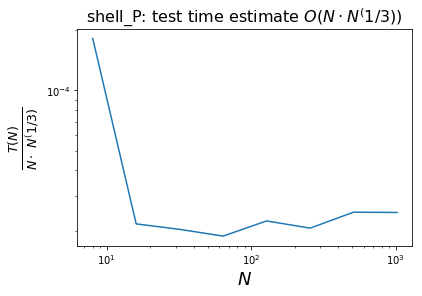

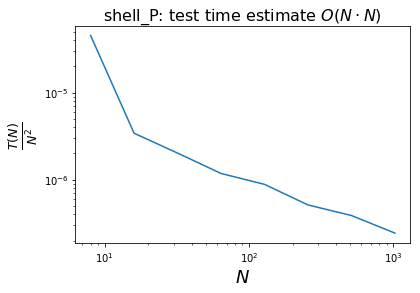

In [24]:
import timeit
import math
import matplotlib.pyplot as plt
start = 8
factor = 2
num_points = 8
num_repeats = 10
N_min = start
N_max = start * factor**(num_points - 1)
N_list = []
T_list = []
n4_3_list = []
n2_list = []
N = N_min
setup = """
import random
from math import log
L=list(range(N))
random.shuffle(L)

def shell_P(L): 
    def Pratt(n):
        d = []
        for i in range(int(log(n, 2))):
            for j in range(int(log(n, 3))):         
                d_i = 2**i * 3**j
                if d_i > n/2:
                    break
                d.append(d_i)
    
        return sorted(d, reverse=True)
    
    gaps = Pratt(len(L))
    for gap in gaps:
        for i in range(gap, len(L)):  
            temp = L[i] 
            j = i
            while j >= gap and L[j - gap] > temp:
                L[j] = L[j - gap]
                j = j - gap
            L[j] = temp
    
"""
while N <= N_max:
    T = timeit.timeit(
        stmt="a = L[:];shell_P(a)",
        setup=setup,
        number=num_repeats,
        globals=dict(N=N)
    )
    T_copy = timeit.timeit(
        stmt="a = L[:]",
        setup=setup,
        number=num_repeats,
        globals=dict(N=N)
    )
    T -= T_copy
    N_list.append(N)
    T_list.append(T)
    n4_3_list.append(T / (N ** (4/3)))
    n2_list.append(T / (N ** 2))
    print("{} length done".format(N))
    N *= factor
    
plt.plot(N_list, n4_3_list)
plt.xlabel(r"${N}$", fontsize=18)
plt.ylabel(r"$\frac{T(N)}{N \cdot \ N^(1/3)}$", fontsize=18)
plt.xscale('log')
plt.yscale('log')
plt.title('shell_P: test time estimate $O(N \cdot N^(1/3))$', fontsize=16)
plt.show()

plt.plot(N_list, n2_list)
plt.xlabel(r"${N}$", fontsize=18)
plt.ylabel(r"$\frac{T(N)}{N^2}$", fontsize=18)
plt.xscale('log')
plt.yscale('log')
plt.title('shell_P: test time estimate $O(N \cdot N)$', fontsize=16)
plt.show()

Оценка временной сложности пузырька

8 length done
16 length done
32 length done
64 length done
128 length done


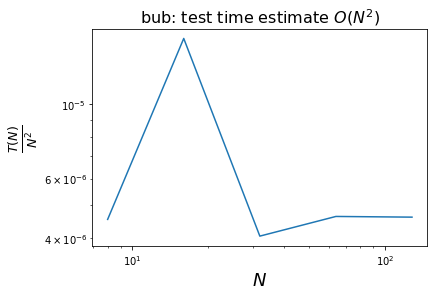

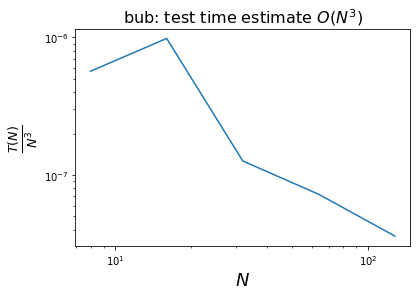

In [3]:
import timeit
import math
import matplotlib.pyplot as plt
%matplotlib inline
start = 8
factor = 2
num_points = 5
num_repeats = 10
N_min = start
N_max = start * factor**(num_points - 1)
N_list = []
T_list = []
n2_list = []
n3_list = []
N = N_min
setup = """
import random
L=list(range(N))
random.shuffle(L)
def bub(L):
    for i in range(len(L)):
        for idx,el in enumerate(L[1:len(L)-i]):
            idx += 1
            if L[idx] < L[idx-1]:
                L[idx-1],L[idx] = L[idx],L[idx-1]
"""
while N <= N_max:
    T = timeit.timeit(
        stmt="a = L[:];bub(a)",
        setup=setup,
        number=num_repeats,
        globals=dict(N=N)
    )
    T_copy = timeit.timeit(
        stmt="a = L[:]",
        setup=setup,
        number=num_repeats,
        globals=dict(N=N)
    )
    T -= T_copy
    N_list.append(N)
    T_list.append(T)
    n2_list.append(T / (N ** 2))
    n3_list.append(T / (N ** 3))
    print("{} length done".format(N))
    N *= factor
    
plt.plot(N_list, n2_list)
plt.xlabel(r"${N}$", fontsize=18)
plt.ylabel(r"$\frac{T(N)}{N^2}$", fontsize=18)
plt.xscale("log")
plt.yscale("log")
plt.title('bub: test time estimate $O(N^2)$', fontsize=16)
plt.show()

plt.plot(N_list, n3_list)
plt.xlabel(r"${N}$", fontsize=18)
plt.ylabel(r"$\frac{T(N)}{N^3}$", fontsize=18)
plt.xscale('log')
plt.yscale('log')
plt.title('bub: test time estimate $O(N^3)$', fontsize=16)
plt.show()

Сортировка вставками

8 length done
16 length done
32 length done
64 length done
128 length done


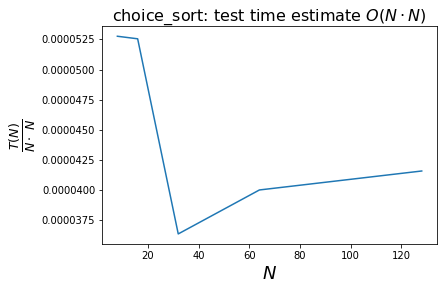

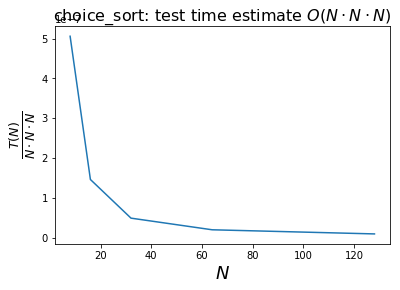

In [141]:
import timeit
import math
import matplotlib.pyplot as plt
start = 8
factor = 2
num_points = 5
num_repeats = 10
N_min = start
N_max = start * factor**(num_points - 1)
N_list = []
T_list = []
n2_list = []
n3_list = []
N = N_min
setup = """
import random
L=list(range(N))
random.shuffle(L)
def choice_sort(L):
    def min_(L):
        m = L[0]
        i = 0
        for j, e in enumerate(L[1:]):
            if e < m:
                #print(e)
                m = e
                i = j + 1
        return i
    for k in range(len(L)-1):
        v = min_(L[k:])
        v += k  
        L[v], L[k] = L[k], L[v]
    return L
"""
while N <= N_max:
    T = timeit.timeit(
        stmt="a = L[:];choice_sort(a)",
        setup=setup,
        number=num_repeats,
        globals=dict(N=N)
    )
    T_copy = timeit.timeit(
        stmt="a = L[:]",
        setup=setup,
        number=num_repeats,
        globals=dict(N=N)
    )
    T -= T_copy
    N_list.append(N)
    T_list.append(T)
    n2_list.append(T / (N ** 2))
    n3_list.append(T / (N ** 3))
    print("{} length done".format(N))
    N *= factor
    
plt.plot(N_list, nlogn_list)
plt.xlabel(r"${N}$", fontsize=18)
plt.ylabel(r"$\frac{T(N)}{N \cdot \ N}$", fontsize=18)
plt.xscale("linear")
plt.yscale("linear")
plt.title('choice_sort: test time estimate $O(N \cdot N)$', fontsize=16)
plt.show()

plt.plot(N_list, n3_list)
plt.xlabel(r"${N}$", fontsize=18)
plt.ylabel(r"$\frac{T(N)}{N \cdot N \cdot N}$", fontsize=18)
plt.xscale('linear')
plt.yscale('linear')
plt.title('choice_sort: test time estimate $O(N \cdot N \cdot N)$', fontsize=16)
plt.show()

In [ ]:
Сортировка вставками

In [ ]:
import timeit
import math
import matplotlib.pyplot as plt
start = 8
factor = 2
num_points = 5
num_repeats = 10
N_min = start
N_max = start * factor**(num_points - 1)
N_list = []
T_list = []
n2_list = []
n3_list = []
N = N_min
setup = """
import random
L=list(range(N))
random.shuffle(L)
def inp(L):
    for i in range(len(L)-1):
        j = i + 1
        while j >= 1 and L[j-1] > L[j]:
            L[j], L[j-1] = L[j-1], L[j]
            j -= 1
    return L
"""
while N <= N_max:
    T = timeit.timeit(
        stmt="a = L[:];inp(a)",
        setup=setup,
        number=num_repeats,
        globals=dict(N=N)
    )
    T_copy = timeit.timeit(
        stmt="a = L[:]",
        setup=setup,
        number=num_repeats,
        globals=dict(N=N)
    )
    T -= T_copy
    N_list.append(N)
    T_list.append(T)
    n2_list.append(T / (N ** 2))
    n3_list.append(T / (N ** 3))
    print("{} length done".format(N))
    N *= factor
    
plt.plot(N_list, nlogn_list)
plt.xlabel(r"${N}$", fontsize=18)
plt.ylabel(r"$\frac{T(N)}{N \cdot \ N}$", fontsize=18)
plt.xscale("linear")
plt.yscale("linear")
plt.title('inp: test time estimate $O(N \cdot N)$', fontsize=16)
plt.show()

plt.plot(N_list, n3_list)
plt.xlabel(r"${N}$", fontsize=18)
plt.ylabel(r"$\frac{T(N)}{N \cdot N \cdot N}$", fontsize=18)
plt.xscale('linear')
plt.yscale('linear')
plt.title('inp: test time estimate $O(N \cdot N \cdot N)$', fontsize=16)
plt.show()

### Упражнение 6. Экспериментальая оценка временной сложности алгоритма

Проверьте, верны ли для реализованных Вами алгоритмов их теоретические временные сложности. Исследуйте сортировки выбором, пузырьком, вставками, расческой. Исследуйте сортировку Шелла в вариантах с последовательностями Седжвика, Пратта и в оригинальном варианте с делением длины промежутка пополам.

Для того чтобы убедиться в том, что тестируемая сложность $O(f(N))$ подходит, надо изучить зависимость отношения $\frac{T(N)}{f(N)}$ от $N$. Если $\displaystyle\lim_{N\to \infty}\frac{T(N)}{f(N)} = С$, где $C > 0$, то сложность алгоритма не превосходит $O(f(N))$. Если $C > 0$, то сложность алгоритма - $O(f(N))$.

Для квадратичных сортировок брать значения $N$, превышающие $10^5$ не следует, так как сортировка будет занимать слишком много времени. У меня сортировка пузырьком списка, состоящего из $10^5$ целых чисел заняла почти 15 мин.

Для измерения времени сортировки используйте модуль [`timeit`](https://docs.python.org/3/library/timeit.html). Аргумент `stmt` функции `timeit.timeit()` содержит код, выполняемый `number` раз, после чего вычисляется среднее время его выполнения. Аргумент `setup` содержит код, который выполняется **1** раз до повторных запусков `stmt`. С помощью аргумента `globals` в `timeit.timeit()` передаются имена, необходимые для успешного выполнения `stmt` и `setup`. 

Обратите внимание, что в `stmt` инициализируется список `a`. Если этого не делать, то начиная со второго повторения `a` будет упорядочен до сортировки.

Ниже приведен пример измерения времени сортировки с помощью метода `list.sort()`. Встроенная сортировка Python использует алгоритм [timsort](https://ru.wikipedia.org/wiki/Timsort), который сочетает в себе сортировки вставками и слиянием. Теоретическая сложность алгоритма $O(N \cdot \log N)$, однако у меня получилось, что сложность алгоритма ближе к $O(N \cdot \log ^2 N)$

8 length done
16 length done
32 length done
64 length done
128 length done
256 length done
512 length done
1024 length done
2048 length done
4096 length done
8192 length done
16384 length done
32768 length done
65536 length done
131072 length done
262144 length done
524288 length done
1048576 length done
2097152 length done
4194304 length done
8388608 length done
16777216 length done
33554432 length done


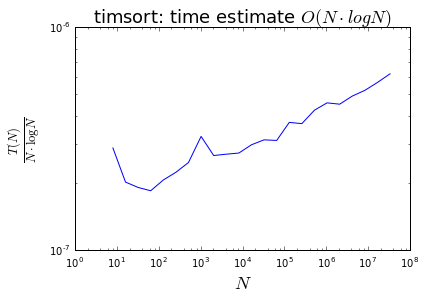

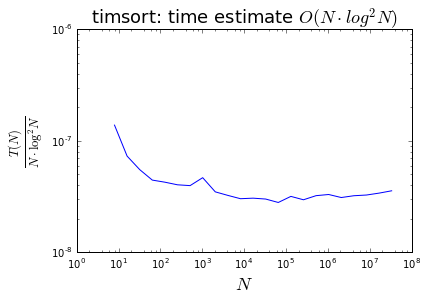

In [2]:
import timeit
import math
import matplotlib.pyplot as plt
start = 8
factor = 2
num_points = 23
num_repeats = 10
N_min = start
N_max = start * factor**(num_points - 1)
N_list = []
T_list = []
nlogn_list = []
nlogn2_list = []
N = N_min
setup = """
import random
L=list(range(N))
random.shuffle(L)
def timsort(l):
    l.sort()
"""
while N <= N_max:
    T = timeit.timeit(
        stmt="a = L[:];timsort(a)",
        setup=setup,
        number=num_repeats,
        globals=dict(N=N)
    )
    T_copy = timeit.timeit(
        stmt="a = L[:]",
        setup=setup,
        number=num_repeats,
        globals=dict(N=N)
    )
    T -= T_copy
    N_list.append(N)
    T_list.append(T)
    nlogn_list.append(T / (N * math.log(N)))
    nlogn2_list.append(T / (N * math.log(N) ** 2))
    print("{} length done".format(N))
    N *= factor
    
plt.plot(N_list, nlogn_list)
plt.xlabel(r"${N}$", fontsize=18)
plt.ylabel(r"$\frac{T(N)}{N \cdot \log N}$", fontsize=18)
plt.xscale('log')
plt.yscale('log')
plt.title('timsort: test time estimate $O(N \cdot log N)$', fontsize=16)
plt.show()

plt.plot(N_list, nlogn2_list)
plt.xlabel(r"${N}$", fontsize=18)
plt.ylabel(r"$\frac{T(N)}{N \cdot \log^2 N}$", fontsize=18)
plt.xscale('log')
plt.yscale('log')
plt.title('timsort: test time estimate $O(N \cdot log ^2 N)$', fontsize=16)
plt.show()

### Упражнение 7. Слияние

В двух файлах <font color=green>seq1.txt</font>, <font color=green>seq2.txt</font> записаны возрастающие последовательности целых чисел. Объедините эти последовательности в одну возрастающую последовательность и запишите ее в третий файл. Постарайтесь сделать алгоритм однопроходным.

#### Пример

| <font size=3>Входные последовательности</font> | <font size=3>Выходная последовательность</font> |
| :---: | :---: |
| <font size=3>1 3 5 7<br>2 3 4 5 6</font> | <font size=3>1 2 3 3 4 5 5 6 7</font> |

In [15]:
with open('seq1.txt', 'r') as f:
    t1 = f.read().split()
with open('seq2.txt','r') as g:
    t2 = g.read().split()
print(t1)



def combine(a,b):
    
    c = []
    while len(a) > 0 and len(b) > 0:
        if a[0] > b[0]:
            c.append(b.pop(0))
        else:
            c.append(a.pop(0))
    if len(a) > 0:
        c.extend(a)
    if len(b) > 0:
        c.extend(b)
    return c
print(t2)
print(" ".join(combine(t1,t2)))

with open('seq3.txt', 'w') as q:
    q.write(" ".join(combine(t1,t2)))


['1', '3', '5', '7']
['2', '3', '4', '5', '6']
1 2 3 3 4 5 5 6 7


In [13]:
with open('seq1.txt','w') as d:
    d.write('1 3 5 7')
with open('seq2.txt','w') as h:
    h.write('2 3 4 5 6')